In [7]:
data_folder = r'C:\Users\dwmcclellan\Desktop\Lab-10\data'
input_raster = 'aster.img'
output_raster = 'savi.tif'
L = 0.5

In [15]:
import arcpy
import matplotlib.pyplot as plt
import numpy as np
import gc
%matplotlib inline

arcpy.env.workspace = data_folder
arcpy.env.overwriteOutput = True

arcpy.CheckOutExtension('spatial')

'CheckedOut'

In [16]:
# Create a Raster object from the red (second) band.
red = arcpy.Raster('aster_b2.tif')

# Create a Raster object from the near-infrared (third) band.
nir = arcpy.Raster('aster_b3.tif')

In [17]:
# Calculate the NDVI, making sure to turn the numerator to floating point
# so it does floating point math. This isn't  huge issue in Python 3, but it was in Python 2,
# so I just like to write out the 'Float()' part
savi = arcpy.sa.Float((1 + L)*(nir - red) / (nir + red))

# Print out statistics for the NDVI raster.
print(savi.minimum, savi.maximum)

-1.5 1.5


5204

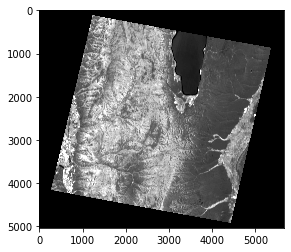

In [18]:
stretch_min = savi.mean - 2 * savi.standardDeviation
stretch_max = savi.mean + 2 * savi.standardDeviation
stretch = plt.Normalize(stretch_min, stretch_max)

img = plt.imshow(arcpy.RasterToNumPyArray(savi), norm=stretch, cmap='gray')
del img
gc.collect()